> This notebook follows the [fastai style conventions](https://docs.fast.ai/dev/style.html#style-guide).

## Importnig packages

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from scipy import stats, integrate
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem Statement
### What is the dependent variable and what are the factors in this data? Who had more chances of survival, what are the factors?
Data exploration section will investigate the dependent variable 'Survived' and understand the relationship of factors such as being a female, or child, or being in a certain class, or having sibling/spouse, parent/child affect the survival rate. We will also come up with a hypothesis and test it.

In [ ]:
data = pd.read_csv('Titanic.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


The titanic data given has 891 rows, most of the columns have 891 rows except Age, Cabin and Embarked.

In [ ]:
print(data['Cabin'].describe())
print(data['Embarked'].describe())
print(data['Age'].describe())

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<matplotlib.text.Text>

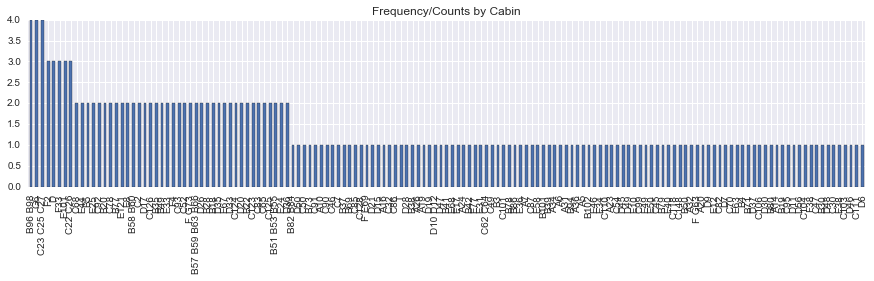

In [ ]:
data['Cabin'].value_counts().plot(kind ='bar', figsize= (15,3))
sns.plt.title('Frequency/Counts by Cabin')

Cabin has 147 unique values for 204 rows, Max freq is 4. It is difficult to draw conclusion on this data and since it has just 22.8% of rows, I will be dropping this column from any further analysis. Also PassengerId does not give me any useful information, so I will drop that column as well

In [ ]:
del data['Cabin']
del data['PassengerId']

Let us also drop the rows with missing values for Age and Embarked now

In [ ]:
data.dropna(subset = ['Embarked', 'Age'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 50.1+ KB


Pclass should not be numeric, so let us update it to upper, middle and lower class. For that, we need to look at its relationship with Fare

<matplotlib.text.Text>

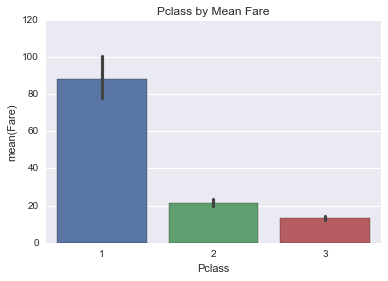

In [ ]:
sns.barplot(x="Pclass", y="Fare", data=data);
sns.plt.title('Pclass by Mean Fare')

Mean Fare of Pclass 1 was 88 dollars, Pclass 2 was 21.47 dollars and Pclass 3 was 13.22 dollars, so let us update the values of Pclass to 'Upper' for Class 1, 'Middle' for Class 2 and 'Lower' for Class 3

In [ ]:
data.loc[data['Pclass'] == 1, 'Pclass'] = 'Upper'
data.loc[data['Pclass'] == 2, 'Pclass'] = 'Middle'
data.loc[data['Pclass'] == 3, 'Pclass'] = 'Lower'

## Data Exploration

<matplotlib.text.Text>

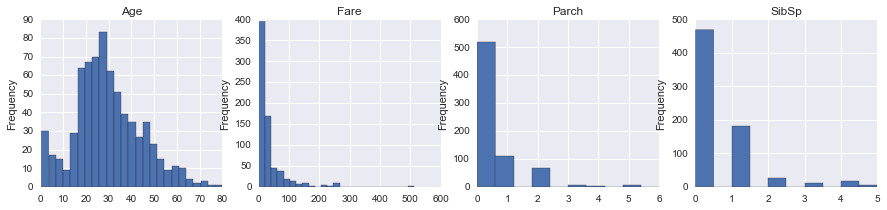

In [ ]:
# Distribution of numeric variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize = (15,3))
data['Age'].plot(kind ='hist', bins = 25, ax=ax1)
ax1.set_title('Age')
data['Fare'].plot(kind = 'hist', bins= 25, ax=ax2)
ax2.set_title('Fare')
data['Parch'].plot(kind = 'hist', ax=ax3)
ax3.set_title('Parch')
data['SibSp'].plot(kind = 'hist', ax=ax4)
ax4.set_title('SibSp')

<matplotlib.text.Text>

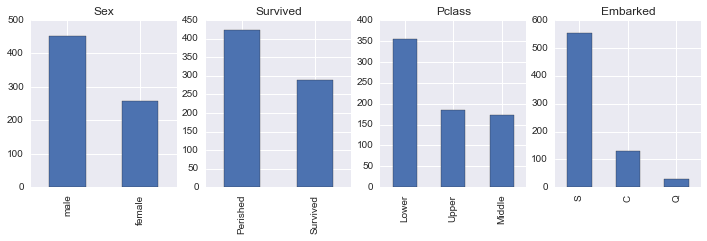

In [ ]:
# Distribution of categorical variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize = (12,3))
data['Sex'].value_counts().plot(kind ='bar', ax=ax1)
ax1.set_title('Sex')
data['Survived'].value_counts().plot(kind = 'bar', ax=ax2)
ax2.set_title('Survived')
ax2.set_xticklabels(['Perished', 'Survived'])
data['Pclass'].value_counts().plot(kind = 'bar', ax=ax3)
ax3.set_title('Pclass')
data['Embarked'].value_counts().plot(kind = 'bar', ax=ax4)
ax4.set_title('Embarked')

The above plots show the distributions of numerical and categorical columns in our data. Age ranges from 0 to 80 years with mean and mode around 25-30 years, Fare ranges from 0 to over 500 dollars, Parch and SibSp has its mode at 0 meaning most people did not travel with any parent/child or sibling/spouse, There were around 453 males and 289 females onboard, 424 perished and 288 survived. Most of the passengers were in Lower Pclass and embarked at station S.

### Understanding the dependencies of dependent and independent variables

Since for the given data, more than 50% of the passengers perished, We will investigate the factors that survival of the passengers depend on and would like to answer questions like did females have more chance of surviving, how does age or fare affect the survival, does having a parent or child, or sibling or spouse influence survival and how does Pclass affect survival. Dependent variable is 'Survived' which gives 0 for rows for passengers who perished and 1 for passengers that survived. Independent variables are Sex, Pclass, Embarked, Age, Fare etc. 

There could be other factors or variables like location of cabins or location/state(sleep or awake) of passengers at the time of the accident etc which we had limited data for and hence ave been omitted from the analysis. We also omitted rows that had missing values for 'Age' and 'Embarked' so that will also skew the statistical analysis a bit.

In [ ]:
#Function to create grouped data by factors
def grouped_by_factors(df,factor):
    mean_by_factor = df.groupby(factor).describe()
    return mean_by_factor

Some understanding of mean/max/std/count would be helpful for our analysis so I created a function to display statistics using groupby function. We will also be creating plots to help visualize the data.

###  Understanding Dependent variable 'Survived' by numerical columns

####  'Survived' by Age and Fare

([<matplotlib.text.Text>], [<matplotlib.text.Text>])

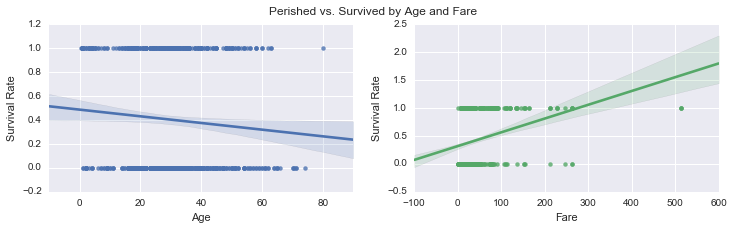

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =(12,3))
fig1 = sns.regplot(x="Age", y="Survived", data=data, ax = ax1)
fig2 = sns.regplot(x="Fare", y="Survived", data=data, ax = ax2)
plt.suptitle("Perished vs. Survived by Age and Fare", size=12)
fig1.set(ylabel='Survival Rate'), fig2.set(ylabel='Survival Rate')

####  'Survived' by SibSp and Parch

<matplotlib.text.Text>

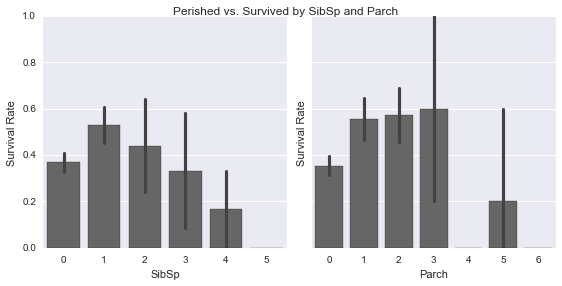

In [ ]:
g = sns.PairGrid(data, y_vars=["Survived"], x_vars=["SibSp", "Parch"], size=4)
g.map(sns.barplot, color=".4")
g.set(ylabel='Survival Rate')
plt.suptitle("Perished vs. Survived by SibSp and Parch", size=12)

In [ ]:
grouped_by_factors(data,'Survived')

Age        Fare       Parch       SibSp
Survived                                                      
0        count  424.000000  424.000000  424.000000  424.000000
         mean    30.626179   22.965456    0.365566    0.525943
         std     14.172110   31.448825    0.878341    1.044760
         min      1.000000    0.000000    0.000000    0.000000
         25%     21.000000    7.895800    0.000000    0.000000
         50%     28.000000   11.887500    0.000000    0.000000
         75%     39.000000   26.550000    0.000000    1.000000
         max     74.000000  263.000000    6.000000    5.000000
1        count  288.000000  288.000000  288.000000  288.000000
         mean    28.193299   51.647672    0.531250    0.496528
         std     14.859146   70.664499    0.808747    0.732512
         min      0.420000    0.000000    0.000000    0.000000
         25%     19.000000   13.000000    0.000000    0.000000
         50%     28.000000   26.250000    0.000000    0.000000
         75%     36.000000   65.000000    1.000000    1.000000
         max     80.000000  512.329200    5.000000    4.000000

The data shows 424 passengers did not survive and 288 did. 

Average age of passengers that survived was 28.2(std=14.8) years as compared to 30.62(14.17) for those who did not survive. On average, passengers who survived paid higher fare(mean=51.6 dollars) as compared to who did not(mean=22.9 dollars). 

From the barchart, the survival rate for those travelling with 1/2 sibling or spouse  and 1/2/3 parent or children was higher than the ones that did not. The relationship of survival is not linear with the number of sibsp/parch which could be due to lack of data.

From the correlation plot, Survival rate is positively correlated to Fare and negatively correlated to Age which means younger people and those who paid more had higher chances of surviving

###  Understanding Dependent variable 'Survived' by Categorical columns

####  'Survived' by Pclass

In [ ]:
grouped_by_factors(data,'Pclass')

Age        Fare       Parch       SibSp    Survived
Pclass                                                                  
Lower  count  355.000000  355.000000  355.000000  355.000000  355.000000
       mean    25.140620   13.229435    0.456338    0.585915    0.239437
       std     12.495398   10.043158    0.971447    1.157303    0.427342
       min      0.420000    0.000000    0.000000    0.000000    0.000000
       25%     18.000000    7.775000    0.000000    0.000000    0.000000
       50%     24.000000    8.050000    0.000000    0.000000    0.000000
       75%     32.000000   15.741700    1.000000    1.000000    0.000000
       max     74.000000   56.495800    6.000000    5.000000    1.000000
Middle count  173.000000  173.000000  173.000000  173.000000  173.000000
       mean    29.877630   21.471556    0.404624    0.427746    0.479769
       std     14.001077   13.187429    0.705775    0.611645    0.501041
       min      0.670000   10.500000    0.000000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000    0.000000    0.000000
       50%     29.000000   15.045800    0.000000    0.000000    0.000000
       75%     36.000000   26.000000    1.000000    1.000000    1.000000
       max     70.000000   73.500000    3.000000    3.000000    1.000000
Upper  count  184.000000  184.000000  184.000000  184.000000  184.000000
       mean    38.105543   88.048121    0.413043    0.456522    0.652174
       std     14.778904   81.293524    0.734061    0.634406    0.477580
       min      0.920000    0.000000    0.000000    0.000000    0.000000
       25%     27.000000   33.890600    0.000000    0.000000    0.000000
       50%     37.000000   67.950000    0.000000    0.000000    1.000000
       75%     49.000000  107.043750    1.000000    1.000000    1.000000
       max     80.000000  512.329200    4.000000    3.000000    1.000000

<matplotlib.text.Text>

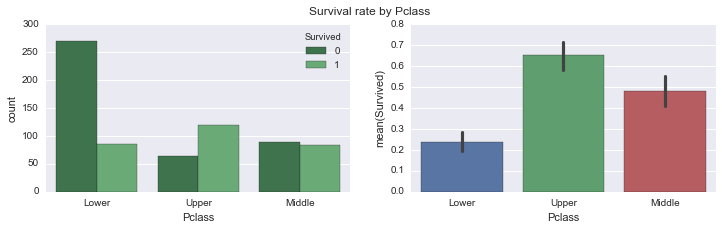

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =(12,3))
fig1 = sns.countplot(x="Pclass", data=data, hue='Survived', palette="Greens_d", ax=ax1);
plt.legend(["Perished", "Survived"])
fig2 = sns.barplot(x="Pclass", y="Survived", data=data, ax=ax2);
plt.suptitle("Survival rate by Pclass", size=12)

Mean Fare of Upper Class was 88 dollars, Middle Class was 21.47 dollars and Lower Class was 13.22 dollars. Most survivors were from upper class(mean survival = 0.65), followed by middle(mean survival = 0.48) and then lower(mean survival = 0.24). Most of the passengers who did not survive belonged to the lower class
Pclass shows linear relation to survival probability. There could be several reasons for that. People in upper classes could have boarded lifeboats before the lower classes, it also fits well with the correlation to fare in the prev plot.

####  'Survived' by Embarked

<matplotlib.legend.Legend>

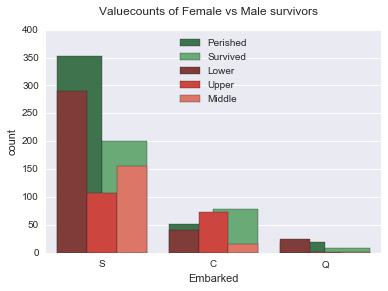

In [ ]:
sns.countplot(x="Embarked", data=data, hue='Survived', palette="Greens_d");
sns.countplot(x="Embarked", data=data, hue='Pclass', palette="Reds_d");
plt.suptitle("Valuecounts of Survivors by Pclass", size=12)
plt.suptitle("Valuecounts of Female vs Male survivors", size=12)
label = ["Perished", "Survived", "Lower", "Upper", "Middle"]
plt.legend(label, loc='upper center')

Most of the passengers were in lower Pclass and embarked from 'S' followed by 'C' and 'Q'. Does not show much relationship to survival rate

####  'Survived' by Sex

In [ ]:
data.groupby('Sex').describe()

Age        Fare       Parch       SibSp    Survived
Sex                                                                     
female count  259.000000  259.000000  259.000000  259.000000  259.000000
       mean    27.745174   47.332433    0.714286    0.644788    0.752896
       std     13.989760   61.517487    1.069045    0.930367    0.432163
       min      0.750000    6.750000    0.000000    0.000000    0.000000
       25%     18.000000   13.000000    0.000000    0.000000    1.000000
       50%     27.000000   26.000000    0.000000    0.000000    1.000000
       75%     36.000000   56.964600    1.000000    1.000000    1.000000
       max     63.000000  512.329200    6.000000    5.000000    1.000000
male   count  453.000000  453.000000  453.000000  453.000000  453.000000
       mean    30.726645   27.268836    0.271523    0.439294    0.205298
       std     14.678201   45.841889    0.651076    0.923609    0.404366
       min      0.420000    0.000000    0.000000    0.000000    0.000000
       25%     21.000000    7.895800    0.000000    0.000000    0.000000
       50%     29.000000   13.000000    0.000000    0.000000    0.000000
       75%     39.000000   28.500000    0.000000    1.000000    0.000000
       max     80.000000  512.329200    5.000000    5.000000    1.000000

<matplotlib.legend.Legend>

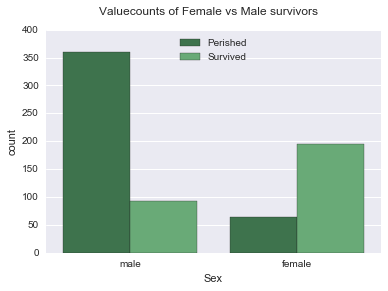

In [ ]:
sns.countplot(x="Sex", data=data, hue='Survived', palette="Greens_d");
plt.suptitle("Valuecounts of Female vs Male survivors", size=12)
label = ["Perished", "Survived"]
plt.legend(label, loc='upper center')

Mean age of females who boarded the ship was 27-28 years and males was 30-31 years. There were 259 females and 453 males, more number of females(mean survival = 0.75) survived than males(mean survival = 0.20)

For the purpose of this analysis, I will pick **Sex, Pclass and Age** as major factors and investigate them further. The reason why I am picking them is because they show correlation with survival rate. Survival showed correlation to Fare as well but since the fare is represented by Pclass, I picked Pclass over Fare. Although other factors also affect survival, but I will focus on these three for this exercise

###  Understanding Pclass and Sex as a factor

<matplotlib.text.Text>

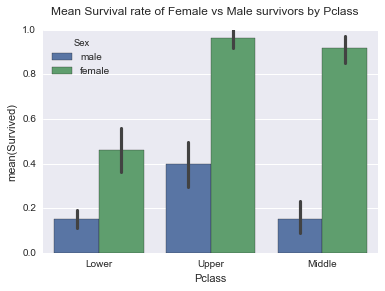

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data);
plt.suptitle("Mean Survival rate of Female vs Male survivors by Pclass", size=12)

There were 314 females and 577 males, mean for female survivors(mean=0.74,std= 0.44) is more than males(mean=0.19,std= 0.39) across all Pclasses, Survival has linear relationship with class. Females had high probability of survival in both Upper and Middle class. Only upper class males had high probability of survival, which was lower than low class female passengers however 

###  Understanding Age as a factor

In [ ]:
print(grouped_by_factors(data,'Age').head())
print(grouped_by_factors(data,'Age').tail())

              Fare  Parch  SibSp  Survived
Age                                       
0.42 count  1.0000    1.0    1.0       1.0
     mean   8.5167    1.0    0.0       1.0
     std       NaN    NaN    NaN       NaN
     min    8.5167    1.0    0.0       1.0
     25%    8.5167    1.0    0.0       1.0
          Fare  Parch  SibSp  Survived
Age                                   
80.0 min  30.0    0.0    0.0       1.0
     25%  30.0    0.0    0.0       1.0
     50%  30.0    0.0    0.0       1.0
     75%  30.0    0.0    0.0       1.0
     max  30.0    0.0    0.0       1.0


<matplotlib.text.Text>

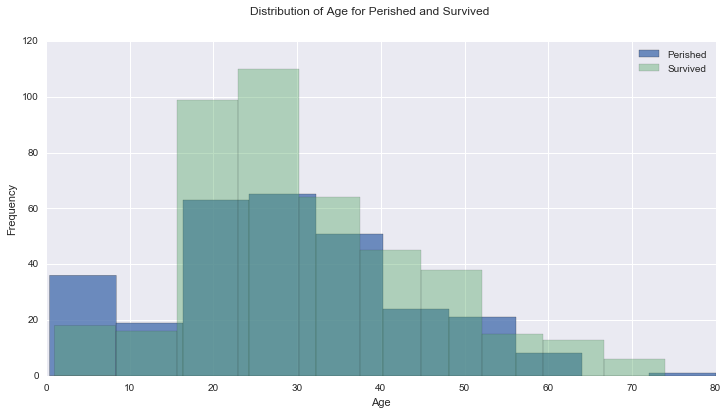

In [ ]:
surv_age = data[data['Survived'] == 1]
g = surv_age['Age'].plot(kind='hist', figsize=[12,6], alpha=.8)
notsurv_age = data[data['Survived'] == 0]
notsurv_age['Age'].plot(kind='hist', figsize=[12,6], alpha=.4)
plt.legend(label)
g.set(xlabel='Age')
plt.suptitle("Distribution of Age for Perished and Survived", size=12)

Age of the passengers ranged from 0 to 80 years. Green bar is for passengers who did not survive and the blue is for those who survived. The distribution is almost normal distribution with similar shape and mode around 20 years. Below is the correlation for Age vs mean survived, it shows slight negative correlation with pearson'r value of -0.082

#### Correlation of 'Survived' with Age

<matplotlib.text.Text>

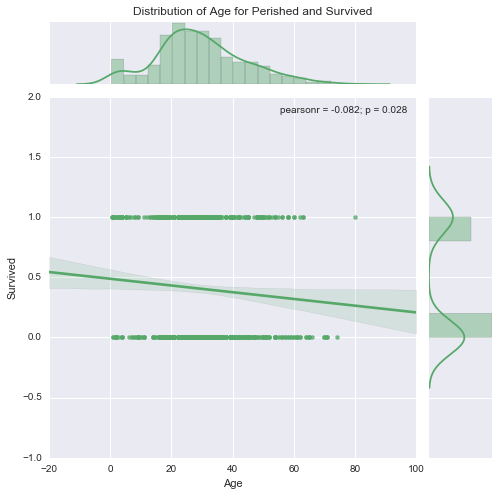

In [ ]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("Age", "Survived", data=data, kind="reg",color="g", size=7)
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Age for Perished and Survived", size=12)

#### Correlation of 'Survived' with Age and Sex

<matplotlib.text.Text>

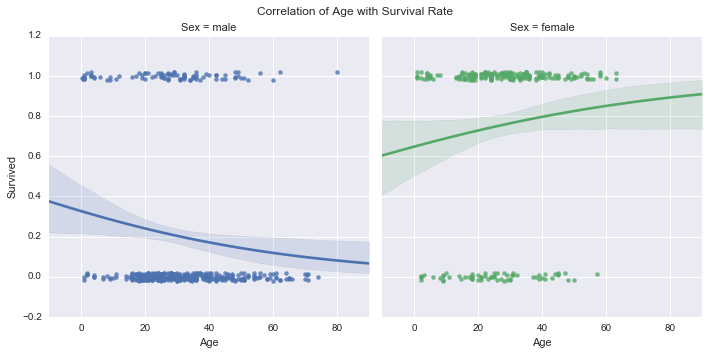

In [ ]:
g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=data, y_jitter=.02, logistic=True)
plt.subplots_adjust(top=0.9)
plt.suptitle("Correlation of Age with Survival Rate", size=12)

Survival probability was higher for Younger Men and Older Women, Side by side comparison of males and females by age further supports that

<seaborn.axisgrid.FacetGrid>

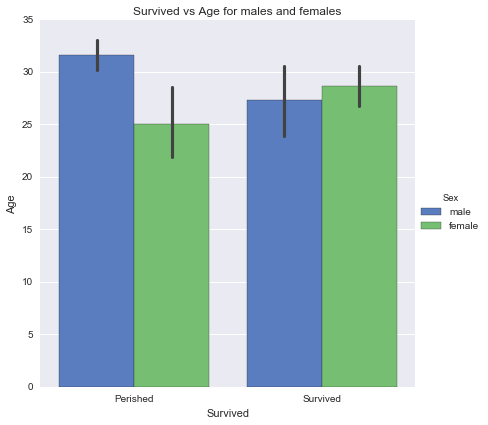

In [ ]:
g = sns.factorplot(x="Survived", y="Age", hue="Sex", data=data, size=6, kind="bar", palette="muted")
g.despine(left=True)
plt.subplots_adjust(top=0.95)
plt.suptitle("Survived vs Age for males and females", size=12)
g.set_xticklabels(['Perished', 'Survived'])

## Hypothesis testing

I have a hypothesis that passengers that are lower in age(<15 years) had greater chance of survival than females.

Null Hypothesis would be that the difference in chances of survival of passengers greater or lower than 15 years is not significant and alternate would be that it is significant.

                            H0: µchild = µfemale at α = 0.05, 
                            HA: µchild ≠ µfemale at α = 0.05, where α is the t-critical at which the probability is .05 and µchild and µfemale are population means for the two groups.

In [ ]:
#Children under 15yrs of age
data_children = data[data['Age'] <= 15]

In [ ]:
#Females of age greater than 15 years
data_female = data[(data['Sex'] == 'female') & (data['Age'] > 15)]

In [ ]:
scipy.stats.ttest_ind(data_children['Survived'], data_female['Survived'], axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-2.978953154108325, pvalue=0.0034528377861817636)

###### Since p value is low, the difference in mean survival is significant for females vs. children. Negative t-statistic shows that the mean survival of females is more than that of children

## Conclusions

In Conclusion with the given dataset, Most contributing factors are 'Sex' and Pclass. Women had the most probability of survival in general. Survival rate is positively correlated to Fare and negatively correlated to Age which means younger people and those who paid more had higher chances of surviving. Females had positive correlation of survival with age and Males had negative correlation. Most survivors were from Upper Pclass followed by medium and lower class passengers. Most of the passengers in lower class perished. Passengers with any parent/child/sibling or spouse had higher chance at survival than the ones that did not.
The analysis has following limitations:
Omitted rows with missing values for 'Age' and 'emabarked'
Did not draw conclusions based on 'Name' column
dropped 'Cabin' and 'PassengerId' during data wrangling phase
The data set is limited, the complete dataset should contain data for 1500 passengers